# Lista 1 - Análise de Estoque de Produtos

Você recebeu um arquivo chamado **estoque.csv**, que contém dados atualizados sobre o estoque de produtos de uma empresa. Cada linha do arquivo representa um registro de um produto no estoque, com as seguintes colunas:
* Data_Atualizacao: Data da última atualização do estoque (formato dd/mm/yyyy).
* Produto: Nome do produto.
* Categoria: Categoria do produto (ex: Alimentos, Eletrônicos, Higiene).
* Quantidade: Quantidade disponível no estoque.
* Preco_Unitario: Preço unitário do produto.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Carregar o CSV

* Leia o arquivo estoque.csv para um DataFrame utilizando a biblioteca pandas.

In [45]:
df = pd.read_csv('estoque.csv')
df.head()

,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario
0,29/03/2023,Monitor,Eletrônicos,97,398.63
1,30/08/2023,Desodorante,Higiene,45,272.30
2,07/12/2023,Arroz,Alimentos,34,487.97
3,15/07/2023,Sabão em Pó,Limpeza,181,419.03
4,14/08/2023,Notebook,Eletrônicos,87,458.93


### 2. Calcular o valor total por produto
* Crie uma nova coluna chamada Valor_Estoque, que representa o valor total do produto em estoque (Quantidade * Preco_Unitario).
* Agrupe os dados por **Produto** e calcule o valor total de estoque para cada um.

In [46]:
df['Valor_Estoque'] = df['Quantidade'] * df['Preco_Unitario']
valor_total = df.groupby('Produto')['Valor_Estoque'].sum()
valor_total

Produto
Arroz               719645.46
Açúcar              479149.04
Café                476571.30
Desinfetante        748190.68
Desodorante         874621.57
Detergente          828664.61
Esponja             674606.56
Feijão              630808.55
Fone de Ouvido     1136656.38
Macarrão            446597.93
Monitor             943618.36
Mouse               867674.57
Notebook            653612.95
Papel Higiênico     891702.11
Pasta de Dente      682512.97
Sabonete            849113.83
Sabão em Pó         720774.22
Sal                 630364.31
Shampoo             940249.54
Teclado             876115.11
Água Sanitária      832433.27
Name: Valor_Estoque, dtype: float64

### 3. Filtrar produtos com baixo estoque
* Filtre todos os produtos cuja **quantidade seja menor que 10 unidades**.
* Crie um DataFrame separado com esses produtos para posterior análise.

In [47]:
baixo_estoque = df[(df['Quantidade'] < 10)]
baixo_estoque

,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario,Valor_Estoque
30,08/12/2023,Notebook,Eletrônicos,6,54.61,327.66
35,02/02/2023,Mouse,Eletrônicos,4,393.09,1572.36
47,21/03/2023,Papel Higiênico,Higiene,3,317.44,952.32
79,27/03/2023,Água Sanitária,Limpeza,9,305.53,2749.77
102,26/11/2023,Arroz,Alimentos,2,423.23,846.46
130,24/09/2023,Sabão em Pó,Limpeza,7,463.33,3243.31
143,25/09/2023,Papel Higiênico,Higiene,3,495.82,1487.46
152,03/07/2023,Esponja,Limpeza,9,93.36,840.24
176,10/11/2023,Fone de Ouvido,Eletrônicos,8,43.73,349.84
355,01/02/2023,Açúcar,Alimentos,9,410.30,3692.70


### 4. Salvar os resultados
* Exporte os produtos com baixo estoque para um novo arquivo CSV chamado estoque_baixo.csv.
* Salve o valor total por produto em uma planilha Excel chamada valor_total_estoque.xlsx, onde cada aba representa uma categoria de produto, com os produtos e seus respectivos valores.

In [48]:
baixo_estoque.to_csv('estoque_baixo.csv')
with pd.ExcelWriter('valor_total_estoque.xlsx') as writer:
    for categoria in df['Categoria'].unique():
        df_categoria = df[df['Categoria'] == categoria]
        valor_categoria = df_categoria.groupby('Produto')['Valor_Estoque'].sum()
        valor_categoria.to_excel(writer, sheet_name=categoria)

### 5. Identificar o produto mais valioso por categoria
* Para cada categoria, identifique o produto com o maior valor total de estoque.
* Crie um DataFrame contendo: Categoria, Produto, Valor_Estoque.

In [49]:
df_valioso = pd.DataFrame(columns=['Categoria', 'Produto', 'Valor_Estoque'])
for categoria in df['Categoria'].unique():
    df_categoria = df[df['Categoria'] == categoria]
    produto_valioso = df_categoria[df_categoria['Valor_Estoque'] == df_categoria['Valor_Estoque'].max()]
    df_valioso = pd.concat([df_valioso, produto_valioso[['Categoria', 'Produto', 'Valor_Estoque']]])

print(df_valioso)

       Categoria     Produto  Valor_Estoque
383  Eletrônicos    Notebook       90268.20
278      Higiene    Sabonete       92627.24
518    Alimentos      Açúcar       81886.09
184      Limpeza  Detergente       83029.62


C:\Users\adail\AppData\Local\Temp\ipykernel_2628\4275830553.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_valioso = pd.concat([df_valioso, produto_valioso[['Categoria', 'Produto', 'Valor_Estoque']]])


### 6. Calcular o valor total do estoque por categoria
* Agrupe os dados por Categoria e calcule a soma total de Valor_Estoque de cada categoria.
* Ordene do maior para o menor.
* Pode ser salvo como CSV ou exibido como gráfico.

Categoria
Eletrônicos    4477677.37
Higiene        4238200.02
Limpeza        3804669.34
Alimentos      3383136.59
Name: Valor_Estoque, dtype: float64


<Axes: title={'center': 'Valor Total de Estoque por Categoria'}, xlabel='Categoria'>

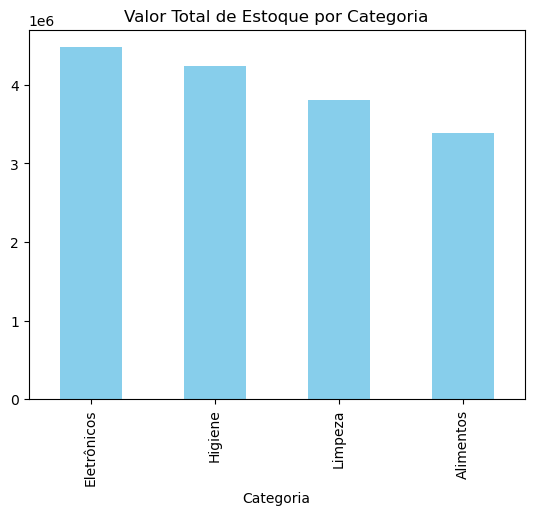

In [50]:
valor_estoque_cat = df.groupby('Categoria')['Valor_Estoque'].sum().sort_values(ascending=False)
print(valor_estoque_cat)
valor_estoque_cat.plot(kind='bar', color='skyblue', title='Valor Total de Estoque por Categoria')

### 7. Classificar produtos em faixas de estoque
* Adicione uma nova coluna chamada Nivel_Estoque com base na Quantidade:
    * Baixo: Quantidade < 10
    * Médio: entre 10 e 50
    * Alto: > 50
* Faça uma contagem por nível.

In [51]:
df['Nivel_Estoque'] = df['Quantidade'].map(lambda x: 'Baixo' if x < 10 else ('Alto' if x > 50 else 'Medio'))
nivel_estoque = df.groupby('Nivel_Estoque')['Produto'].count()
print(df.head(), '\n', nivel_estoque)

  Data_Atualizacao      Produto    Categoria  Quantidade  Preco_Unitario  \
0       29/03/2023      Monitor  Eletrônicos          97          398.63   
1       30/08/2023  Desodorante      Higiene          45          272.30   
2       07/12/2023        Arroz    Alimentos          34          487.97   
3       15/07/2023  Sabão em Pó      Limpeza         181          419.03   
4       14/08/2023     Notebook  Eletrônicos          87          458.93   

   Valor_Estoque Nivel_Estoque  
0       38667.11          Alto  
1       12253.50         Medio  
2       16590.98         Medio  
3       75844.43          Alto  
4       39926.91          Alto   
 Nivel_Estoque
Alto     462
Baixo     18
Medio    120
Name: Produto, dtype: int64


<center><b>Bônus (Opcional):</b></center>

### 8. Análise temporal
* Converta a coluna Data_Atualizacao para o tipo datetime.
* Agrupe por mês (ou trimestre) e calcule:
    * Número de atualizações de estoque
    * Quantidade média dos produtos atualizados
* Gere uma visualização de linha temporal com esses dados.

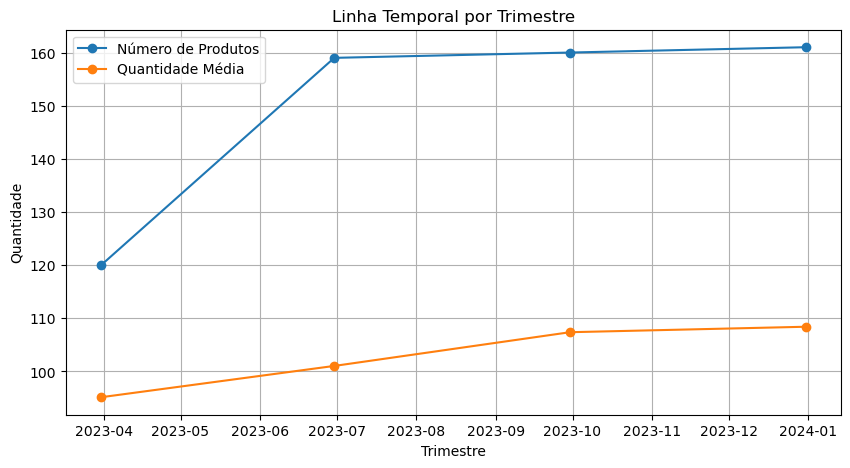

In [52]:
df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'], format='%d/%m/%Y')
trimestre = df.groupby(pd.Grouper(key='Data_Atualizacao', freq='QE')).agg(
    Num_Att=('Produto', 'count'),
    Qtd_Media=('Quantidade', 'mean')
).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(trimestre['Data_Atualizacao'], trimestre['Num_Att'], marker='o', label='Número de Produtos')
plt.plot(trimestre['Data_Atualizacao'], trimestre['Qtd_Media'], marker='o', label='Quantidade Média')
plt.title('Linha Temporal por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade')
plt.legend()
plt.grid()
plt.show()